# Práctica 1: Reconocimiento de dígitos manuscritos con extracción manual de características

El nuevo banco "First bank of Wiki" desea implementar un sistema de reconocimiento automático de cheques como el siguiente:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)


Actualmente, el banco cuenta con un sistema capaz de aislar los dígitos y convertirlos en imágenes de 8 x 8, pero no de reconocer de qué dígito se trata. Por esa razón, nos ha solicitado realizar un módulo capaz de reconocer dígitos manuscritos dada una imagen de 8 x 8 pixeles:


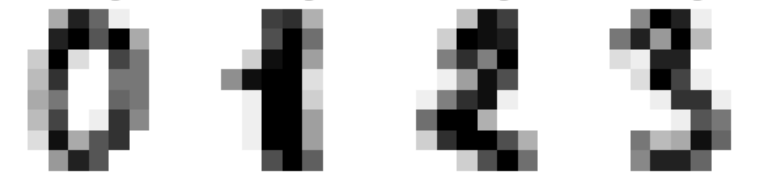



# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

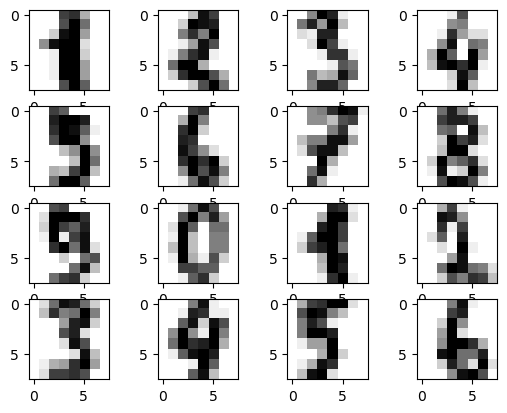

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))


# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [ ]:
# Cargo los dígitos
X, y = digits.images, digits.target

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Total de datos para clasificación entre 10 dígitos: {y.shape[0]}")

values, counts = np.unique(y_train, return_counts=True)
print(f"Datos de entrenamiento: {y_train.shape[0]}")
print(f"Datos de test: {y_test.shape[0]}")
print("Distribución de clases en el conjunto de entrenamiento:")
for value, count in zip(values, counts):
    print(f"  - {value}: {count} muestras")

Total de datos para clasificación entre 10 dígitos: 1797
Datos de entrenamiento: 1257
Datos de test: 540
Distribución de clases en el conjunto de entrenamiento:
  - 0: 125 muestras
  - 1: 132 muestras
  - 2: 130 muestras
  - 3: 129 muestras
  - 4: 121 muestras
  - 5: 116 muestras
  - 6: 128 muestras
  - 7: 124 muestras
  - 8: 131 muestras
  - 9: 121 muestras


In [10]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (1257, 64)
Dimensiones de X_test: (540, 64)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Definimos un pereceptrón
clasificador = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenamos el clasificador
clasificador.fit(X_train, y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_test, y_test)))

# Imprimir las predicciones realizadas para los datos de test
print("Predictions: " + str(clasificador.predict(X_test)))


Accuracy en test: 0.9666666666666667
Predictions: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 9 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 2 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 2 9 3 9 7 2 9 0 4 5 8 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 2 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 0 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 8 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 8 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 7 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9

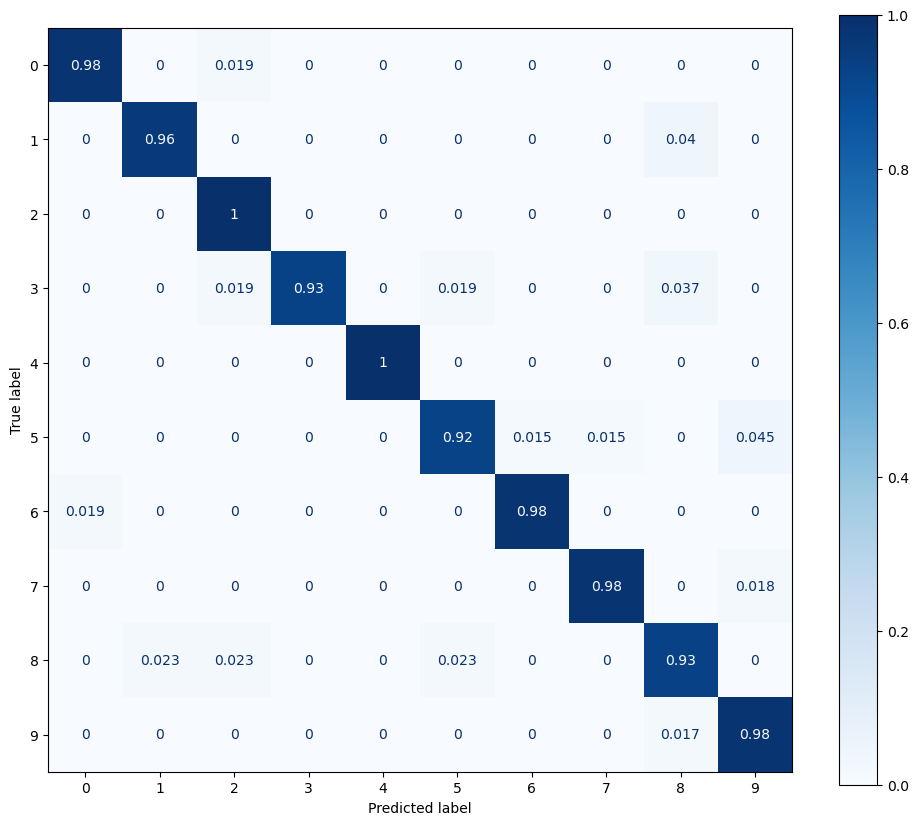

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, clasificador.predict(X_test), normalize='true')

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues,ax=ax)

plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Calcular métricas de evaluación
recall = recall_score(y_test, clasificador.predict(X_test), average='weighted')
precision = precision_score(y_test, clasificador.predict(X_test), average='weighted')
f1 = f1_score(y_test, clasificador.predict(X_test), average='weighted')

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, clasificador.predict(X_test), target_names=digits.target_names.astype(str)))

Recall: 0.97
Precision: 0.97
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.98      0.96      0.97        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.92      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.89      0.93      0.91        43
           9       0.94      0.98      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Entregable:

Emplear redes neuronales para la predicción de los tipos de cobertura para los datos de la zona del dique Roggero.

 1. Realizar un análisis exploratorio de los datos, y estandarizar/normalizar las variables en caso de ser necesario.
 2. Diseñar al menos 3 arquitecturas diferentes de redes con complejidades apreciablemente diferentes.
 3. Comparar los resultados (i.e. comparar las métricas accuracy, f1_score, recall, precision) con los obtenidos empleando los 3 métodos aprendidos en la clase de aprendizaje supervisado.